Initial Model: KMEANS and DECISION TREE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

LOADING DATA

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Analytics Project/Data/Complete Data/FINAL_RAW_DF.csv')
data_raw = data.copy()
data['release_date'] = data['release_date'].astype('datetime64[ns]')
data['release_date'] = data['release_date'].dt.year
playlist = pd.read_csv('/content/drive/MyDrive/Analytics Project/Initial Model/playlist_df _TRIAL.csv')
playlist['release_date'] = playlist['release_date'].astype('datetime64[ns]')
playlist['release_date'] = playlist['release_date'].dt.year
data.head()

,track_id,track_name,artist_name,popularity,album,uri,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,release_date
0,1Es7AUAhQvapIcoh3qMKDL,Timeless (with Playboi Carti),"['The Weeknd', 'Playboi Carti']",92,Timeless,spotify:track:1Es7AUAhQvapIcoh3qMKDL,0.769,0.722,11,-5.485,...,0.1110,0.570,119.973,audio_features,1Es7AUAhQvapIcoh3qMKDL,https://api.spotify.com/v1/tracks/1Es7AUAhQvap...,https://api.spotify.com/v1/audio-analysis/1Es7...,256000,4,2024.0
1,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","['The Weeknd', 'JENNIE', 'Lily-Rose Depp']",90,The Idol Episode 4 (Music from the HBO Origina...,spotify:track:7CyPwkp0oE8Ro9Dd5CUDjW,0.264,0.640,8,-6.221,...,0.1510,0.190,84.828,audio_features,7CyPwkp0oE8Ro9Dd5CUDjW,https://api.spotify.com/v1/tracks/7CyPwkp0oE8R...,https://api.spotify.com/v1/audio-analysis/7CyP...,244685,4,2023.0
2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,['The Weeknd'],88,After Hours,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.513,0.730,1,-5.940,...,0.0897,0.334,171.001,audio_features,0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,2020.0
3,7MXVkk9YMctZqd1Srtv4MB,Starboy,"['The Weeknd', 'Daft Punk']",87,Starboy,spotify:track:7MXVkk9YMctZqd1Srtv4MB,0.679,0.587,7,-7.015,...,0.1370,0.486,186.003,audio_features,7MXVkk9YMctZqd1Srtv4MB,https://api.spotify.com/v1/tracks/7MXVkk9YMctZ...,https://api.spotify.com/v1/audio-analysis/7MXV...,230453,4,2016.0
4,2LBqCSwhJGcFQeTHMVGwy3,Die For You,['The Weeknd'],84,Starboy,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,0.586,0.525,1,-7.163,...,0.1340,0.508,133.629,audio_features,2LBqCSwhJGcFQeTHMVGwy3,https://api.spotify.com/v1/tracks/2LBqCSwhJGcF...,https://api.spotify.com/v1/audio-analysis/2LBq...,260253,4,2016.0


DROPPING NULLS (FOR SIMPLICITY)

In [ ]:
data = data.select_dtypes(include=np.number)
data = data.dropna()

In [ ]:
X = data.to_numpy()
print(data.shape)

(22077, 15)


In [ ]:
subset_X = X[:1000]
subset_data_raw = data_raw.head(1000)
subset_data = data.head(1000)
subset_data

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date
0,92,0.769,0.722,11,-5.485,0,0.0507,0.05840,0.000003,0.1110,0.570,119.973,256000,4,2024.0
1,90,0.264,0.640,8,-6.221,1,0.0442,0.03930,0.000002,0.1510,0.190,84.828,244685,4,2023.0
2,88,0.513,0.730,1,-5.940,1,0.0598,0.00143,0.000095,0.0897,0.334,171.001,200040,4,2020.0
3,87,0.679,0.587,7,-7.015,1,0.2760,0.14100,0.000006,0.1370,0.486,186.003,230453,4,2016.0
4,84,0.586,0.525,1,-7.163,0,0.0615,0.11100,0.000000,0.1340,0.508,133.629,260253,4,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,73,0.754,0.763,7,-4.627,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,4,2023.0
996,75,0.558,0.655,0,-5.476,1,0.0379,0.20800,0.000000,0.0854,0.390,129.890,156923,4,2024.0
997,71,0.673,0.659,3,-4.493,0,0.0439,0.53900,0.000000,0.1290,0.628,88.011,179053,4,2021.0
998,70,0.614,0.934,9,-3.709,0,0.0700,0.06970,0.000000,0.1210,0.436,116.001,174760,4,2020.0


The value of k with the highest intercluster distance: 10


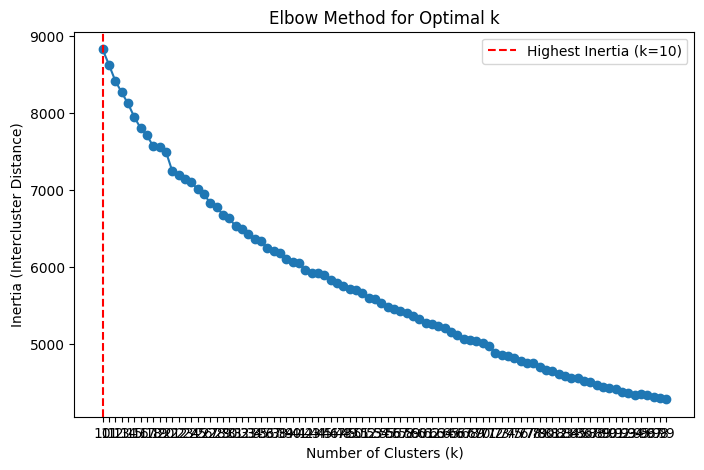

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset_X)

# Range of k values to test
k_values = range(10, 100)
inertias = []

# Iterate over k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # Inertia measures intercluster distances

# Find the k with the highest intercluster distance
highest_inertia_k = k_values[np.argmax(inertias)]
print(f"The value of k with the highest intercluster distance: {highest_inertia_k}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xticks(k_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Intercluster Distance)")
plt.title("Elbow Method for Optimal k")
plt.axvline(x=highest_inertia_k, color='r', linestyle='--', label=f"Highest Inertia (k={highest_inertia_k})")
plt.legend()
plt.show()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


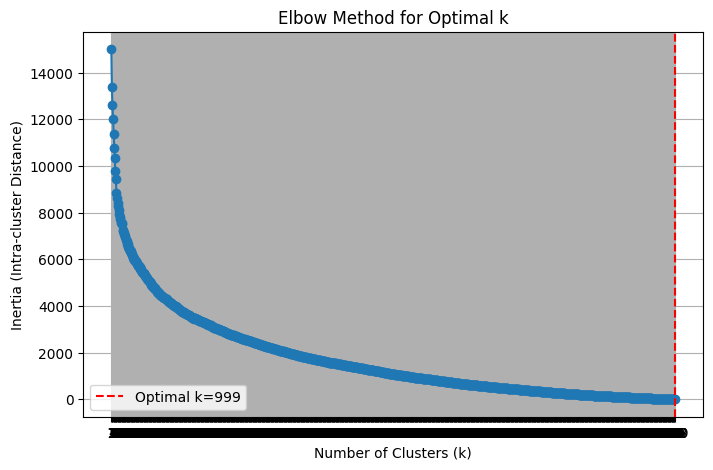

The optimal k based on the Elbow Method: 999


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset_X)

# Range of k values to test
k_values = range(1, 1000)
inertias = []

# Iterate over k values
for k in k_values:
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # Inertia measures intra-cluster distances

# Plot the results to visualize the elbow point
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xticks(k_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Intra-cluster Distance)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)

# Highlight the elbow point if needed
optimal_k = k_values[inertias.index(min(inertias))]  # Find the k with the minimal inertia
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k={optimal_k}")
plt.legend()

plt.show()

# Print the optimal k value (based on visualization)
print(f"The optimal k based on the Elbow Method: {optimal_k}")


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset_X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=30, random_state=42)  # Set n_clusters to the number of clusters you want
labels = kmeans.fit_predict(X_scaled)

# Make a copy of subset_data to avoid SettingWithCopyWarning
subset_data = subset_data.copy()
subset_data['cluster'] = labels
subset_data_raw['cluster'] = labels

# Count the occurrences of each cluster
cluster_counts = subset_data['cluster'].value_counts()
print(cluster_counts)



cluster
17    71
20    68
0     65
24    63
12    60
7     57
5     49
19    48
11    45
27    42
21    41
22    38
2     35
4     34
9     33
15    31
25    31
3     30
18    26
1     26
6     25
16    23
10    20
29    11
13    10
23     7
14     5
8      3
26     2
28     1
Name: count, dtype: int64


<ipython-input-76-de4f5a721f6b>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=3, random_state=42)
embedding = tsne.fit_transform(X_scaled)
projection = pd.DataFrame(columns=['x', 'y', 'z'], data=embedding)
projection['cluster'] = subset_data['cluster']
projection['track_name'] = subset_data_raw['track_name']
projection['artist_name'] = subset_data_raw['artist_name']

fig = px.scatter_3d(
    projection, x='x', y='y', z='z', color='cluster', hover_data=['x', 'y', 'z', 'track_name', 'artist_name'])
fig.show()

GETTING AN AGGREGATED PLAYLIST EMBEDDING

In [ ]:
playlist.head()

,track_id,track_name,artist_name,popularity,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,release_date
0,0LN0ASTtcGIbNTnjSHG6eO,Pour Some Sugar On Me (2012),['Def Leppard'],0,Pour Some Sugar On Me (2012),0.497,0.849,9,-5.352,1,0.0612,0.00985,0.000000,0.106,0.720,169.937,audio_features,261532,4,1987
1,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,['AC/DC'],84,Highway to Hell,0.574,0.913,6,-4.793,0,0.1330,0.06100,0.001580,0.156,0.423,115.728,audio_features,208400,4,1979
2,37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer,['Bon Jovi'],83,Slippery When Wet,0.532,0.887,0,-3.757,1,0.0335,0.07780,0.000206,0.294,0.794,122.509,audio_features,249293,4,1986
3,5RKQ5NdjSh2QzD4MaunT91,Don't Stop Believin' (2022 Remaster),['Journey'],85,Escape (2022 Remaster),0.505,0.754,4,-7.435,1,0.0366,0.13200,0.000000,0.204,0.510,119.204,audio_features,249600,4,1981
4,7tFiyTwD0nx5a1eklYtX2J,Bohemian Rhapsody - Remastered 2011,['Queen'],69,A Night At The Opera (Deluxe Remastered Version),0.391,0.402,0,-9.961,0,0.0539,0.28900,0.000000,0.243,0.228,143.879,audio_features,354320,4,1975


In [ ]:
playlist_numeric = playlist.select_dtypes(include=np.number)
playlist_numeric = playlist_numeric.dropna()
playlist_numeric.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date
0,0,0.497,0.849,9,-5.352,1,0.0612,0.00985,0.000000,0.106,0.720,169.937,261532,4,1987
1,84,0.574,0.913,6,-4.793,0,0.1330,0.06100,0.001580,0.156,0.423,115.728,208400,4,1979
2,83,0.532,0.887,0,-3.757,1,0.0335,0.07780,0.000206,0.294,0.794,122.509,249293,4,1986
3,85,0.505,0.754,4,-7.435,1,0.0366,0.13200,0.000000,0.204,0.510,119.204,249600,4,1981
4,69,0.391,0.402,0,-9.961,0,0.0539,0.28900,0.000000,0.243,0.228,143.879,354320,4,1975


In [ ]:
# Calculate the mean of each numeric column
playlist_mean = playlist_numeric.mean()

# Calculate the mode for categorical/ordinal columns
most_common_key = playlist_numeric['key'].mode()[0]
most_common_mode = playlist_numeric['mode'].mode()[0]
most_common_time_signature = playlist_numeric['time_signature'].mode()[0]

# Create a DataFrame to display both mean and most common values
playlist_summary = playlist_mean.to_frame(name='mean_value').T
playlist_summary['key'] = most_common_key
playlist_summary['mode'] = most_common_mode
playlist_summary['time_signature'] = most_common_time_signature

playlist_summary

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date
mean_value,66.531073,0.516922,0.736696,9,-7.757869,1,0.058049,0.131311,0.032966,0.187681,0.553875,126.205465,256540.579096,4,1987.107345


In [ ]:
playlist_summary = playlist_summary.to_numpy()
playlist_summary_scaled = scaler.transform(playlist_summary)
playlist_summary_scaled

array([[-0.7511171 , -1.1304057 ,  0.39544003,  1.06022694, -0.87378398,
         0.93416229, -0.42123492, -0.31835158,  0.31444594,  0.03829053,
         0.12794427,  0.26425041,  0.85020335,  0.10546253, -2.98341617]])

In [ ]:
predicted_cluster = kmeans.predict(playlist_summary_scaled)
print('Predicted cluster that songs in this playlist belong in is', predicted_cluster)

Predicted cluster that songs in this playlist belong in is [6]


In [ ]:
from sklearn.metrics import pairwise_distances
import pandas as pd

playlist_song_ids = playlist['track_id'].tolist()
# Assuming `labels` is the cluster label for each song from KMeans clustering
# Add cluster labels to the original scaled data
subset_data_raw['distance'] = pairwise_distances(X_scaled, playlist_summary_scaled, metric='euclidean').flatten()

# Filter songs in the same predicted cluster
same_cluster_songs = subset_data_raw[subset_data_raw['cluster'] == predicted_cluster[0]]

# Filter out songs already in the playlist
same_cluster_songs = same_cluster_songs[~same_cluster_songs['track_id'].isin(playlist_song_ids)]

# Sort by distance to find the 10 closest songs
closest_songs = same_cluster_songs.nsmallest(10, 'distance')

# Display the closest songs
closest_songs


<ipython-input-14-cf70536eca2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data_raw['distance'] = pairwise_distances(X_scaled, playlist_summary_scaled, metric='euclidean').flatten()


,track_id,track_name,artist_name,popularity,album,uri,danceability,energy,key,loudness,...,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,release_date,cluster,distance
419,7GqWnsKhMtEW0nzki5o0d8,Killer Queen - Remastered 2011,['Queen'],68,Sheer Heart Attack (Deluxe Remastered Version),spotify:track:7GqWnsKhMtEW0nzki5o0d8,0.535,0.650,10,-6.328,...,117.188,audio_features,7GqWnsKhMtEW0nzki5o0d8,https://api.spotify.com/v1/tracks/7GqWnsKhMtEW...,https://api.spotify.com/v1/audio-analysis/7GqW...,179600,4,1974-11-08,6,2.631878
939,4bEb3KE4mSKlTFjtWJQBqO,Don't Stop - 2004 Remaster,['Fleetwood Mac'],72,Rumours,spotify:track:4bEb3KE4mSKlTFjtWJQBqO,0.671,0.710,9,-7.724,...,118.745,audio_features,4bEb3KE4mSKlTFjtWJQBqO,https://api.spotify.com/v1/tracks/4bEb3KE4mSKl...,https://api.spotify.com/v1/audio-analysis/4bEb...,193347,4,1977-02-04,6,2.725447
416,11IzgLRXV7Cgek3tEgGgjw,Under Pressure - Remastered 2011,"['Queen', 'David Bowie']",70,Hot Space (Deluxe Remastered Version),spotify:track:11IzgLRXV7Cgek3tEgGgjw,0.671,0.711,2,-7.813,...,113.809,audio_features,11IzgLRXV7Cgek3tEgGgjw,https://api.spotify.com/v1/tracks/11IzgLRXV7Cg...,https://api.spotify.com/v1/audio-analysis/11Iz...,248440,4,1982-05-03,6,2.848518
407,7HW5WIw7ZgZORCzUxv5gW5,Don't Go Breaking My Heart,"['Elton John', 'Kiki Dee']",78,Rock Of The Westies,spotify:track:7HW5WIw7ZgZORCzUxv5gW5,0.729,0.844,5,-8.824,...,131.459,audio_features,7HW5WIw7ZgZORCzUxv5gW5,https://api.spotify.com/v1/tracks/7HW5WIw7ZgZO...,https://api.spotify.com/v1/audio-analysis/7HW5...,275440,4,1975-10-24,6,3.056162
934,07GvNcU1WdyZJq3XxP0kZa,Go Your Own Way - 2004 Remaster,['Fleetwood Mac'],77,Rumours,spotify:track:07GvNcU1WdyZJq3XxP0kZa,0.583,0.947,5,-5.120,...,135.448,audio_features,07GvNcU1WdyZJq3XxP0kZa,https://api.spotify.com/v1/tracks/07GvNcU1WdyZ...,https://api.spotify.com/v1/audio-analysis/07Gv...,223613,4,1977-02-04,6,3.151832
409,4IRHwIZHzlHT1FQpRa5RdE,Goodbye Yellow Brick Road - Remastered 2014,['Elton John'],74,Goodbye Yellow Brick Road (Remastered),spotify:track:4IRHwIZHzlHT1FQpRa5RdE,0.559,0.473,5,-7.712,...,121.227,audio_features,4IRHwIZHzlHT1FQpRa5RdE,https://api.spotify.com/v1/tracks/4IRHwIZHzlHT...,https://api.spotify.com/v1/audio-analysis/4IRH...,192827,4,1973-10-05,6,3.388691
590,2v7ywbUzCgcVohHaKUcacV,Like a Prayer,['Madonna'],71,Like a Prayer,spotify:track:2v7ywbUzCgcVohHaKUcacV,0.660,0.629,5,-12.359,...,111.926,audio_features,2v7ywbUzCgcVohHaKUcacV,https://api.spotify.com/v1/tracks/2v7ywbUzCgcV...,https://api.spotify.com/v1/audio-analysis/2v7y...,340867,4,1989-03-21,6,3.727066
412,6WCeFNVAXUtNczb7lqLiZU,Crocodile Rock,['Elton John'],72,Don't Shoot Me I'm Only The Piano Player,spotify:track:6WCeFNVAXUtNczb7lqLiZU,0.621,0.800,4,-7.284,...,149.908,audio_features,6WCeFNVAXUtNczb7lqLiZU,https://api.spotify.com/v1/tracks/6WCeFNVAXUtN...,https://api.spotify.com/v1/audio-analysis/6WCe...,235440,4,1973-01-22,6,3.836529
938,19Ym5Sg0YyOCa6ao21bdoG,Gypsy,['Fleetwood Mac'],74,Greatest Hits,spotify:track:19Ym5Sg0YyOCa6ao21bdoG,0.622,0.540,5,-13.990,...,130.879,audio_features,19Ym5Sg0YyOCa6ao21bdoG,https://api.spotify.com/v1/tracks/19Ym5Sg0YyOC...,https://api.spotify.com/v1/audio-analysis/19Ym...,264907,4,1988-11-21,6,3.844018
725,3BovdzfaX4jb5KFQwoPfAw,Beat It,['Michael Jackson'],79,Thriller,spotify:track:3BovdzfaX4jb5KFQwoPfAw,0.776,0.711,3,-9.030,...,138.728,audio_features,3BovdzfaX4jb5KFQwoPfAw,https://api.spotify.com/v1/tracks/3BovdzfaX4jb...,https://api.spotify.com/v1/audio-analysis/3Bov...,258400,4,1982-11-30,6,3.931160


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Analytics Project/Data/Complete Data/FINAL_RAW_DF.csv')
data_raw = data.copy()
data['release_date'] = data['release_date'].astype('datetime64[ns]')
data['release_date'] = data['release_date'].dt.year
playlist = pd.read_csv('/content/drive/MyDrive/Analytics Project/Initial Model/playlist_df _TRIAL.csv')
playlist['release_date'] = playlist['release_date'].astype('datetime64[ns]')
playlist['release_date'] = playlist['release_date'].dt.year
playlist.head()

,track_id,track_name,artist_name,popularity,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,release_date
0,0LN0ASTtcGIbNTnjSHG6eO,Pour Some Sugar On Me (2012),['Def Leppard'],0,Pour Some Sugar On Me (2012),0.497,0.849,9,-5.352,1,0.0612,0.00985,0.000000,0.106,0.720,169.937,audio_features,261532,4,1987
1,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,['AC/DC'],84,Highway to Hell,0.574,0.913,6,-4.793,0,0.1330,0.06100,0.001580,0.156,0.423,115.728,audio_features,208400,4,1979
2,37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer,['Bon Jovi'],83,Slippery When Wet,0.532,0.887,0,-3.757,1,0.0335,0.07780,0.000206,0.294,0.794,122.509,audio_features,249293,4,1986
3,5RKQ5NdjSh2QzD4MaunT91,Don't Stop Believin' (2022 Remaster),['Journey'],85,Escape (2022 Remaster),0.505,0.754,4,-7.435,1,0.0366,0.13200,0.000000,0.204,0.510,119.204,audio_features,249600,4,1981
4,7tFiyTwD0nx5a1eklYtX2J,Bohemian Rhapsody - Remastered 2011,['Queen'],69,A Night At The Opera (Deluxe Remastered Version),0.391,0.402,0,-9.961,0,0.0539,0.28900,0.000000,0.243,0.228,143.879,audio_features,354320,4,1975


In [ ]:
playlist_concat_df = pd.read_csv('/content/drive/MyDrive/Analytics Project/Initial Model/training_data_df_TRIAL.csv')
playlist_concat_df['release_date'] = playlist_concat_df['release_date'].astype('datetime64[ns]')
playlist_concat_df['release_date'] = playlist_concat_df['release_date'].dt.year
playlist_concat_df.shape

(1416, 24)

In [ ]:
playlist_track_ids = playlist['track_id'].tolist()
playlist_concat_df['in_playlist'] = playlist_concat_df['track_id'].apply(lambda x: 1 if x in playlist_track_ids else 0)

In [ ]:
playlist_concat_df.head()

,track_id,track_name,artist_name,popularity,album,uri,danceability,energy,key,loudness,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,release_date,in_playlist
0,1nmZ8yqKkfooOuYvtFctDp,Heat Of The Moment,['Asia'],67,Asia,NaN,0.306,0.860,1,-7.371,...,0.541,136.265,audio_features,NaN,NaN,NaN,227893,4,1982.0,1
1,50eJOxJiGmJ7PBZaTKpje1,make up sex (feat. blackbear),"['mgk', 'blackbear']",60,mainstream sellout,spotify:track:50eJOxJiGmJ7PBZaTKpje1,0.665,0.678,5,-4.122,...,0.682,131.986,audio_features,50eJOxJiGmJ7PBZaTKpje1,https://api.spotify.com/v1/tracks/50eJOxJiGmJ7...,https://api.spotify.com/v1/audio-analysis/50eJ...,122570,4,2022.0,0
2,2EqlS6tkEnglzr7tkKAAYD,Come Together - Remastered 2009,['The Beatles'],75,Abbey Road (Remastered),NaN,0.530,0.376,9,-11.913,...,0.188,164.775,audio_features,NaN,NaN,NaN,259946,4,1969.0,1
3,3cbJ48vdcTrBMeereYxYUc,No Puedo Olvidarlo,['Marisela'],61,15 Éxitos de Marisela Vol. 1,spotify:track:3cbJ48vdcTrBMeereYxYUc,0.642,0.205,4,-18.716,...,0.545,93.259,audio_features,3cbJ48vdcTrBMeereYxYUc,https://api.spotify.com/v1/tracks/3cbJ48vdcTrB...,https://api.spotify.com/v1/audio-analysis/3cbJ...,243427,4,1998.0,0
4,2CtemffYhT0DJWcT1XW047,Nothing Else Matters (Remastered),['Metallica'],68,Metallica (Remastered),spotify:track:2CtemffYhT0DJWcT1XW047,0.547,0.394,4,-9.793,...,0.170,142.370,audio_features,2CtemffYhT0DJWcT1XW047,https://api.spotify.com/v1/tracks/2CtemffYhT0D...,https://api.spotify.com/v1/audio-analysis/2Cte...,388733,3,1991.0,1


In [ ]:
X_vals = playlist_concat_df.drop(['track_id', 'track_name', 'artist_name', 'album', 'uri', 'type', 'id', 'track_href', 'analysis_url', 'in_playlist'], axis = 1)
y_vals = playlist_concat_df['in_playlist']

In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vals, y_vals, test_size=0.3, random_state=21)

NameError: name 'X_vals' is not defined

In [ ]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

DTC = DecisionTreeClassifier()

distributions = {'max_depth': randint(1, 10), 'min_samples_split': randint(2, 50)}
DT = RandomizedSearchCV(DTC, distributions, cv = 5, verbose = 2, random_state = 42, n_jobs=-1, return_train_score = True, n_iter = 500)
searchDT = DT.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
print('Best performance using decision tree is '+ str(searchDT.best_score_) + ' with a max depth of ' + str(searchDT.best_params_['max_depth']) + ' and a min samples split of '+ str(searchDT.best_params_['min_samples_split']) )

Best performance using decision tree is 0.8627480838536116 with a max depth of 1 and a min samples split of 37


In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
DTC = DecisionTreeClassifier

best_clf = DTC(max_depth = 4, min_samples_split = 37)
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

test accuracy:  0.8494117647058823
Precision:  0.8016528925619835
Recall 0.9238095238095239
Fall-out rate:  0.22325581395348837
F1 score 0.8584070796460178


Text(50.722222222222214, 0.5, 'Actual')

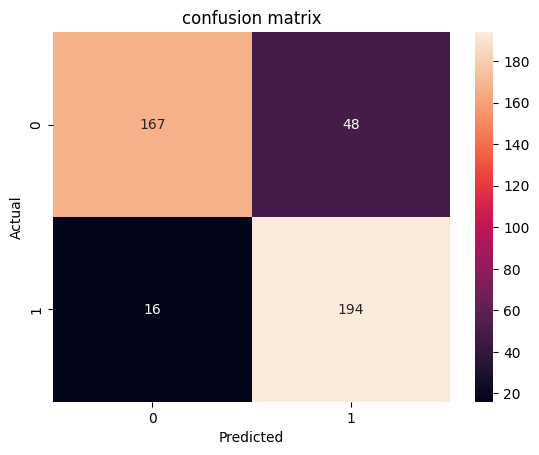

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

FP = cm[0, 1]
TN = cm[0, 0]

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('test accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))
print('Fall-out rate: ', FP / (FP + TN))
print('F1 score', 2*((recall*precision)/(recall + precision)))

sns.heatmap(data = cm, annot = True, fmt='.3g')
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [ ]:
closest_songs

,track_id,track_name,artist_name,popularity,album,uri,danceability,energy,key,loudness,...,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,release_date,cluster,distance
419,7GqWnsKhMtEW0nzki5o0d8,Killer Queen - Remastered 2011,['Queen'],68,Sheer Heart Attack (Deluxe Remastered Version),spotify:track:7GqWnsKhMtEW0nzki5o0d8,0.535,0.650,10,-6.328,...,117.188,audio_features,7GqWnsKhMtEW0nzki5o0d8,https://api.spotify.com/v1/tracks/7GqWnsKhMtEW...,https://api.spotify.com/v1/audio-analysis/7GqW...,179600,4,1974-11-08,6,2.631878
939,4bEb3KE4mSKlTFjtWJQBqO,Don't Stop - 2004 Remaster,['Fleetwood Mac'],72,Rumours,spotify:track:4bEb3KE4mSKlTFjtWJQBqO,0.671,0.710,9,-7.724,...,118.745,audio_features,4bEb3KE4mSKlTFjtWJQBqO,https://api.spotify.com/v1/tracks/4bEb3KE4mSKl...,https://api.spotify.com/v1/audio-analysis/4bEb...,193347,4,1977-02-04,6,2.725447
416,11IzgLRXV7Cgek3tEgGgjw,Under Pressure - Remastered 2011,"['Queen', 'David Bowie']",70,Hot Space (Deluxe Remastered Version),spotify:track:11IzgLRXV7Cgek3tEgGgjw,0.671,0.711,2,-7.813,...,113.809,audio_features,11IzgLRXV7Cgek3tEgGgjw,https://api.spotify.com/v1/tracks/11IzgLRXV7Cg...,https://api.spotify.com/v1/audio-analysis/11Iz...,248440,4,1982-05-03,6,2.848518
407,7HW5WIw7ZgZORCzUxv5gW5,Don't Go Breaking My Heart,"['Elton John', 'Kiki Dee']",78,Rock Of The Westies,spotify:track:7HW5WIw7ZgZORCzUxv5gW5,0.729,0.844,5,-8.824,...,131.459,audio_features,7HW5WIw7ZgZORCzUxv5gW5,https://api.spotify.com/v1/tracks/7HW5WIw7ZgZO...,https://api.spotify.com/v1/audio-analysis/7HW5...,275440,4,1975-10-24,6,3.056162
934,07GvNcU1WdyZJq3XxP0kZa,Go Your Own Way - 2004 Remaster,['Fleetwood Mac'],77,Rumours,spotify:track:07GvNcU1WdyZJq3XxP0kZa,0.583,0.947,5,-5.120,...,135.448,audio_features,07GvNcU1WdyZJq3XxP0kZa,https://api.spotify.com/v1/tracks/07GvNcU1WdyZ...,https://api.spotify.com/v1/audio-analysis/07Gv...,223613,4,1977-02-04,6,3.151832
409,4IRHwIZHzlHT1FQpRa5RdE,Goodbye Yellow Brick Road - Remastered 2014,['Elton John'],74,Goodbye Yellow Brick Road (Remastered),spotify:track:4IRHwIZHzlHT1FQpRa5RdE,0.559,0.473,5,-7.712,...,121.227,audio_features,4IRHwIZHzlHT1FQpRa5RdE,https://api.spotify.com/v1/tracks/4IRHwIZHzlHT...,https://api.spotify.com/v1/audio-analysis/4IRH...,192827,4,1973-10-05,6,3.388691
590,2v7ywbUzCgcVohHaKUcacV,Like a Prayer,['Madonna'],71,Like a Prayer,spotify:track:2v7ywbUzCgcVohHaKUcacV,0.660,0.629,5,-12.359,...,111.926,audio_features,2v7ywbUzCgcVohHaKUcacV,https://api.spotify.com/v1/tracks/2v7ywbUzCgcV...,https://api.spotify.com/v1/audio-analysis/2v7y...,340867,4,1989-03-21,6,3.727066
412,6WCeFNVAXUtNczb7lqLiZU,Crocodile Rock,['Elton John'],72,Don't Shoot Me I'm Only The Piano Player,spotify:track:6WCeFNVAXUtNczb7lqLiZU,0.621,0.800,4,-7.284,...,149.908,audio_features,6WCeFNVAXUtNczb7lqLiZU,https://api.spotify.com/v1/tracks/6WCeFNVAXUtN...,https://api.spotify.com/v1/audio-analysis/6WCe...,235440,4,1973-01-22,6,3.836529
938,19Ym5Sg0YyOCa6ao21bdoG,Gypsy,['Fleetwood Mac'],74,Greatest Hits,spotify:track:19Ym5Sg0YyOCa6ao21bdoG,0.622,0.540,5,-13.990,...,130.879,audio_features,19Ym5Sg0YyOCa6ao21bdoG,https://api.spotify.com/v1/tracks/19Ym5Sg0YyOC...,https://api.spotify.com/v1/audio-analysis/19Ym...,264907,4,1988-11-21,6,3.844018
725,3BovdzfaX4jb5KFQwoPfAw,Beat It,['Michael Jackson'],79,Thriller,spotify:track:3BovdzfaX4jb5KFQwoPfAw,0.776,0.711,3,-9.030,...,138.728,audio_features,3BovdzfaX4jb5KFQwoPfAw,https://api.spotify.com/v1/tracks/3BovdzfaX4jb...,https://api.spotify.com/v1/audio-analysis/3Bov...,258400,4,1982-11-30,6,3.931160


In [ ]:
closest_songs['release_date'] = closest_songs['release_date'].astype('datetime64[ns]')
closest_songs['release_date'] = closest_songs['release_date'].dt.year
closest_X_vals = closest_songs.drop(['track_id', 'track_name', 'artist_name', 'album', 'uri', 'type', 'id', 'track_href', 'analysis_url', 'cluster', 'distance'], axis = 1)
closest_X_vals

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date
419,68,0.535,0.650,10,-6.328,1,0.0554,0.3790,0.000000,0.1400,0.610,117.188,179600,4,1974
939,72,0.671,0.710,9,-7.724,1,0.0356,0.0393,0.000011,0.0387,0.834,118.745,193347,4,1977
416,70,0.671,0.711,2,-7.813,1,0.0478,0.4220,0.000000,0.1040,0.466,113.809,248440,4,1982
407,78,0.729,0.844,5,-8.824,1,0.0344,0.1490,0.000003,0.0604,0.777,131.459,275440,4,1975
934,77,0.583,0.947,5,-5.120,1,0.0378,0.0185,0.001090,0.0679,0.803,135.448,223613,4,1977
409,74,0.559,0.473,5,-7.712,1,0.0279,0.4460,0.001410,0.1540,0.397,121.227,192827,4,1973
590,71,0.660,0.629,5,-12.359,1,0.0387,0.4320,0.000073,0.1720,0.324,111.926,340867,4,1989
412,72,0.621,0.800,4,-7.284,0,0.0344,0.0264,0.000015,0.0590,0.968,149.908,235440,4,1973
938,74,0.622,0.540,5,-13.990,1,0.0261,0.0170,0.007710,0.2650,0.847,130.879,264907,4,1988
725,79,0.776,0.711,3,-9.030,0,0.0473,0.0242,0.000353,0.2340,0.901,138.728,258400,4,1982


In [ ]:
closest_X_vals = scaler.fit_transform(closest_X_vals)

In [ ]:
y_pred_proba_class1 = best_clf.predict_proba(closest_X_vals)

In [ ]:
# Create a DataFrame with song index and prediction probability
# Create a DataFrame with song index and prediction probability
song_predictions_df = pd.DataFrame({'song_index': closest_songs['track_name'], 'artist_name': closest_songs['artist_name'],
                                     'prediction_probability': y_pred_proba_class1[:, 1]}) # Select the probabilities for class 1 only

In [ ]:
song_predictions_df = song_predictions_df.sort_values(by=['prediction_probability'], ascending=False)

In [ ]:
song_predictions_df

,song_index,artist_name,prediction_probability
934,Go Your Own Way - 2004 Remaster,['Fleetwood Mac'],0.975904
407,Don't Go Breaking My Heart,"['Elton John', 'Kiki Dee']",0.962329
412,Crocodile Rock,['Elton John'],0.962329
419,Killer Queen - Remastered 2011,['Queen'],0.820000
409,Goodbye Yellow Brick Road - Remastered 2014,['Elton John'],0.820000
939,Don't Stop - 2004 Remaster,['Fleetwood Mac'],0.620690
938,Gypsy,['Fleetwood Mac'],0.551724
725,Beat It,['Michael Jackson'],0.551724
416,Under Pressure - Remastered 2011,"['Queen', 'David Bowie']",0.076923
590,Like a Prayer,['Madonna'],0.015924


In [ ]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 25.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px

# If subset_X is a NumPy array, convert it to a DataFrame for easier processing
subset_X_df = pd.DataFrame(subset_X)

# Check for NaNs using NumPy
num_nans = np.isnan(subset_X).sum()
print(f"Number of NaNs in dataset: {num_nans}")

# Handle NaNs
if num_nans > 0:
    if num_nans < 10:
        print("Dropping rows with NaNs.")
        subset_X_df = subset_X_df.dropna()
    else:
        print("Replacing NaNs with column means.")
        subset_X_df = subset_X_df.fillna(subset_X_df.mean())

# Convert back to NumPy array after handling NaNs
subset_X = subset_X_df.to_numpy()

# Shift the data to make all values positive
subset_X_shifted = subset_X - subset_X.min(axis=0).min() + 1

# Apply log transformation to reduce skewness
subset_X_log = np.log1p(subset_X_shifted)

# Standardize the log-transformed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset_X_log)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
subset_data_raw['kmeans_cluster'] = kmeans_labels

# Create a DataFrame for visualization
projection = pd.DataFrame(X_scaled, columns=[f"feature_{i}" for i in range(X_scaled.shape[1])])
projection['kmeans_cluster'] = kmeans_labels
projection['track_name'] = subset_data_raw['track_name']
projection['artist_name'] = subset_data_raw['artist_name']

# Use the first three features for 3D visualization
fig = px.scatter_3d(projection, x="feature_0", y="feature_1", z="feature_2", color="kmeans_cluster",
                    hover_data=['track_name', 'artist_name'],
                    title="KMeans Clustering with Log-Transformed Data (3D Visualization)")
fig.show()


Number of NaNs in dataset: 0


<ipython-input-62-7220ed6cee6a>:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

